Material for the book [Probability and Statistics for Data Science](https://a.co/d/cAss9mO). A free preprint, videos, code, slides and solutions to exercises are available at https://www.ps4ds.net/

Code for Examples 10.1, 10.3, 10.5, 10.7, 10.9 and 10.16, and Figure 10.3

Analysis of die rolls from a die that we suspect is not fair\
Topics: Null hypothesis, test statistic, p value, parametric testing, power function

Author: Carlos Fernandez-Granda

p value 0.152


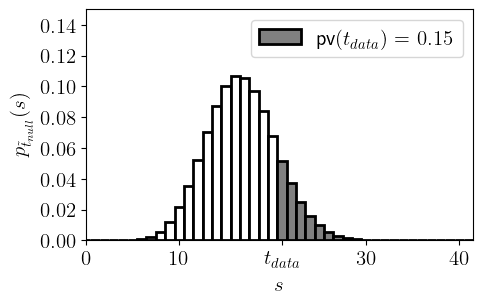

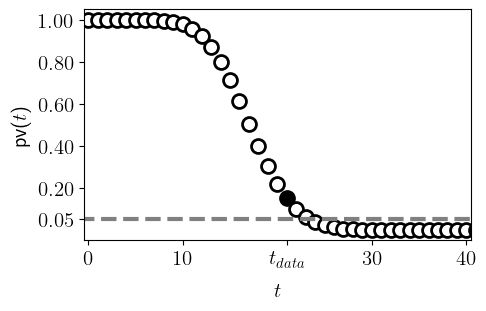

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom
matplotlib.rcParams['text.usetex'] = True

from numpy.random import default_rng
rng = default_rng(2021)

font_size = 15
font_size_legend = 15
font_size_ticks = 15

n = 100
theta_null = 1./6 # Corresponding to the null hypothesis that the die is fair 
t_statistic = 21 # Observed number of threes

x = np.arange(0,n+1,1)
x_max = 40
pmf = binom.pmf(x, n, theta_null)
cum_sum_pmf = np.cumsum(pmf[::-1])[::-1] 
pval = cum_sum_pmf[t_statistic]
print("p value",round(pval,3))

plt.figure(figsize=(5,3))
plt.bar(x[x< t_statistic],pmf[x< t_statistic], width = 1, color = "white", edgecolor="black",linewidth = 2)
plt.bar(x[x>=t_statistic],pmf[x>=t_statistic], width = 1, color = "gray", edgecolor="black",linewidth = 2,
        label=r"pv$(t_{data})$ = $0.15$")
plt.xticks([0,10,t_statistic,30,40],[r"$0$",r"$10$","$t_{data}$",r"$30$",r"$40$"],fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.xlim([0,x_max+1.5])
plt.ylim([0,0.15])
plt.ylabel(r"$p_{\tilde{t}_{null}}(s)$",fontsize=font_size,labelpad = 5)
plt.xlabel(r'$s$',labelpad = 5,fontsize=font_size)
plt.legend(fontsize=font_size_legend)
plt.show()

plt.figure(figsize=(5,3))
plt.plot(x,cum_sum_pmf, "o",markersize=10,markerfacecolor='white',markeredgecolor="black",markeredgewidth=2)
plt.plot(x[t_statistic],cum_sum_pmf[t_statistic], "o",markersize=10,markerfacecolor='black',markeredgecolor="black",
         label=r"pv$(t_{data})$ = $0.15$")
plt.hlines(0.05,-1,x_max+1,lw=3,ls="dashed",label="Significance threshold",color="gray")
plt.xticks([0,10,t_statistic,30,40],[r"$0$",r"$10$","$t_{data}$",r"$30$",r"$40$"],fontsize=font_size_ticks) 
plt.yticks([0.05,0.2,0.4,0.6,0.8,1],fontsize=font_size_ticks)
plt.xlim([-0.5,x_max+0.5])
plt.ylabel(r"pv($t$)",fontsize=font_size,labelpad = 5)
plt.xlabel(r'$t$',labelpad =10,fontsize=font_size)
plt.show()

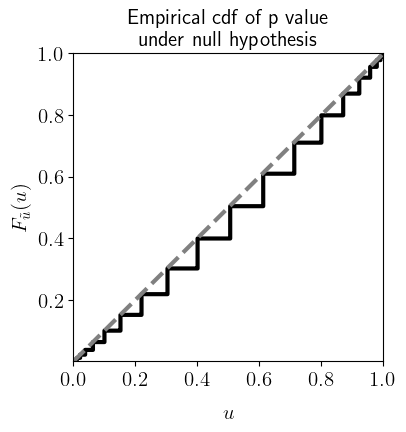

In [2]:
def empirical_cdf(x):
    x_sorted = np.sort(x)
    cdf = np.arange(1, len(x_sorted)+1) / float(len(x_sorted))
    return x_sorted, cdf

m = int(1e5)
rng = default_rng(2022)
theta_null = 1/6
simulated_rolls = rng.binomial(n,theta_null,m)
p_values = cum_sum_pmf[simulated_rolls]
sorted_p_values, cdf = empirical_cdf(p_values) 

x_min = 0
x_max = 1
y_min = 0
y_max = 1
plt.figure(figsize=(4,4))
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(np.arange(0.2,1.2,0.2),fontsize=font_size_ticks)
plt.step(sorted_p_values,cdf,linewidth=3,color="black")
plt.plot([0,1],[0,1],linewidth=3,color="gray",ls="dashed")
plt.xlim([x_min,x_max])
plt.ylim([y_min,y_max])
plt.xlabel(r'$u$',fontsize=font_size,labelpad=10)
plt.ylabel(r'$F_{\tilde{u}}(u)$',fontsize=font_size,labelpad=5)
plt.title("Empirical cdf of p value\n under null hypothesis",fontsize=font_size);

In [4]:
# Computation of power function
theta_null = 1/6
n = 100
alpha_vals = [0.25,0.05,0.01]
thresh = {}
theta_vals = np.arange(0,1,0.0005) #np.arange(0,0.2+0.01,0.001)
power = {}
for ind_alpha,alpha in enumerate(alpha_vals):
    print("Significance level = ",alpha)
    pmf = binom.pmf(np.arange(0,n,1), n, theta_null) 
    cum_sum_pmf = np.cumsum(pmf[::-1])[::-1] 
    aux_p_val = np.nonzero(cum_sum_pmf <= alpha)
    thresh[ind_alpha] = aux_p_val[0][0]
    print("Threshold for test statistic:",thresh[ind_alpha])
    power[ind_alpha] = np.zeros(len(theta_vals))
    for ind,theta in enumerate(theta_vals):
        power[ind_alpha][ind] = np.sum(binom.pmf(np.arange(thresh[ind_alpha],n+1), n, theta))

Significance level =  0.25
Threshold for test statistic: 20
Significance level =  0.05
Threshold for test statistic: 24
Significance level =  0.01
Threshold for test statistic: 27


Power for theta = 1/4
Significance level =  0.25
0.9
Significance level =  0.05
0.629
Significance level =  0.01
0.358


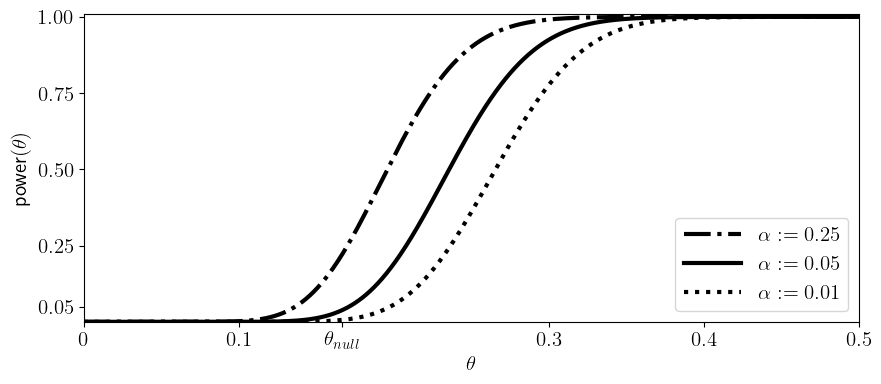

In [5]:
styles = ['dashdot','solid','dotted']

print("Power for theta = 1/4")
for ind_alpha,alpha in enumerate(alpha_vals):
    print("Significance level = ",alpha)
    print(np.round(np.sum(binom.pmf(np.arange(thresh[ind_alpha],n+1), n, 1/4)),3))

fig = plt.figure(figsize=(10,4))
label_alpha = [r"$\alpha:=0.25$",r"$\alpha:=0.05$",r"$\alpha:=0.01$"]
for ind_alpha,alpha in enumerate(alpha_vals):
    plt.plot(theta_vals,power[ind_alpha],lw=3,ls=styles[ind_alpha],color="black",label=label_alpha[ind_alpha])
plt.xticks([0,0.1,1./6,0.3,0.4,0.5],[r"$0$",r"$0.1$",r"$\theta_{null}$",r"$0.3$",r"$0.4$",r"$0.5$"],fontsize=font_size_ticks) 
plt.yticks([0.05,0.25,0.5,0.75,1],fontsize=font_size_ticks)
ax = plt.gca()
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.xlim([0,0.5])
plt.ylim([0,1.01])
plt.ylabel(r"power$(\theta)$",fontsize=font_size,labelpad = 5)
plt.xlabel(r'$\theta$',fontsize=font_size)
plt.legend(fontsize=font_size_legend,loc = "lower right",handlelength=2.75);

In [6]:
# Power computation
theta_null = 1/6
n_vals = [500,100,20]
p_val_thresh = 0.05
thresh = {}
theta_vals = np.arange(0,1,0.0005) #np.arange(0,0.2+0.01,0.001)
power_n = {}
for ind_n,n in enumerate(n_vals):
    print("n = ",n)
    pmf = binom.pmf(np.arange(0,n,1), n, theta_null) 
    cum_sum_pmf = np.cumsum(pmf[::-1])[::-1] 
    aux_p_val = np.nonzero(cum_sum_pmf <= p_val_thresh)
    thresh[ind_n] = aux_p_val[0][0]
    print("Threshold for test statistic:",thresh[ind_n])
    power_n[ind_n] = np.zeros(len(theta_vals))
    for ind,theta in enumerate(theta_vals):
        power_n[ind_n][ind] = np.sum(binom.pmf(np.arange(thresh[ind_n],n+1), n, theta))

n =  500
Threshold for test statistic: 98
n =  100
Threshold for test statistic: 24
n =  20
Threshold for test statistic: 7


Power for theta = 1/4
500
0.9982
100
0.6289
20
0.2142


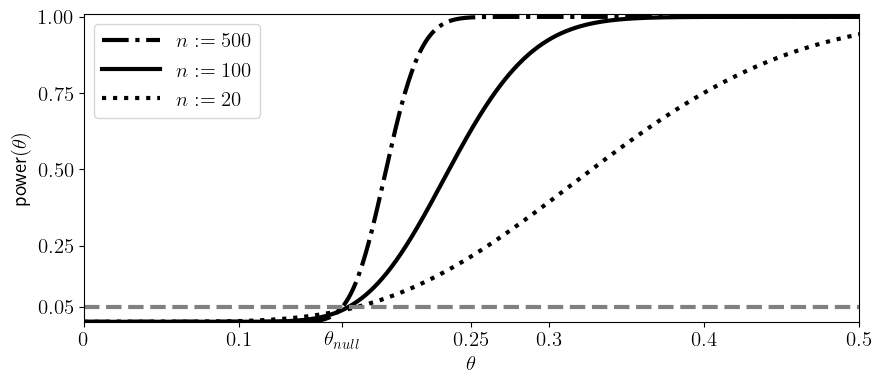

In [7]:
styles = ['dashdot','solid','dotted']

print("Power for theta = 1/4")
for ind_n,n in enumerate(n_vals):
    print(n)
    print(np.round(np.sum(binom.pmf(np.arange(thresh[ind_n],n+1), n, 1/4)),4))

fig = plt.figure(figsize=(10,4))
label_n = ["$n:=500$","$n:=100$",r"$n:=20$"]
for ind_n,n in enumerate(n_vals):
    plt.plot(theta_vals,power_n[ind_n],lw=3,ls=styles[ind_n],color="black",label=label_n[ind_n])
plt.xticks([0,0.1,1./6,0.25,0.3,0.4,0.5],[r"$0$",r"$0.1$",r"$\theta_{null}$",r"$0.25$",r"$0.3$",r"$0.4$",r"$0.5$"],fontsize=font_size_ticks) 
plt.yticks([0.05,0.25,0.5,0.75,1],fontsize=font_size_ticks)
ax = plt.gca()
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.xlim([0,0.5])
plt.ylim([0,1.01])
plt.hlines(0.05,0,1,lw=3,ls="dashed",color="gray")#,label = "Significance level")
plt.ylabel(r"power$(\theta)$",fontsize=font_size,labelpad = 5)
plt.xlabel(r'$\theta$',fontsize=font_size)
plt.legend(fontsize=font_size_legend,loc = "upper left",handlelength=2.75);